DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [4]:
data=pd.read_csv('StudentsPerformance.csv')

In [5]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Renaming Columns

In [7]:
data.rename(columns={"race/ethnicity":"group","parental level of education":"parent_edu","test preparation course":"prep",
                     "math score":"math","reading score":"reading","writing score":"writing"},inplace=True)

In [8]:
data.head(10)

,gender,group,parent_edu,lunch,prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [9]:
pd.unique(data['group'])

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
pd.unique(data['parent_edu'])

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

LABEL ENCODING

In [11]:
data.replace({'group':{'group A':0,'group B':1,'group C':2,'group D':3,'group E':4}},inplace=True)
data.replace({'parent_edu':{"bachelor's degree":0,'some college':1,"master's degree":2,"associate's degree":3,'high school':4,'some high school':5}},inplace=True)
data.replace({'lunch':{'standard':0,'free/reduced':1,}},inplace=True)
data.replace({'prep':{'none':0,'completed':1,}},inplace=True)
data.replace({'gender':{'male':0,'female':1,}},inplace=True)

In [12]:
data.head(20)

,gender,group,parent_edu,lunch,prep,math,reading,writing
0,1,1,0,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,2,0,0,90,95,93
3,0,0,3,1,0,47,57,44
4,0,2,1,0,0,76,78,75
5,1,1,3,0,0,71,83,78
6,1,1,1,0,1,88,95,92
7,0,1,1,1,0,40,43,39
8,0,3,4,1,1,64,64,67
9,1,1,4,1,0,38,60,50


Creating an average score column

In [13]:
data['average_score']=data['math']+data['reading']+data['writing']/3

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

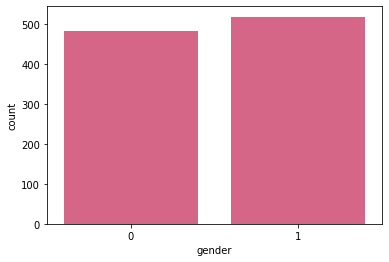

In [14]:
sns.countplot(data['gender'],color='#e75480')

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='group', ylabel='count'>

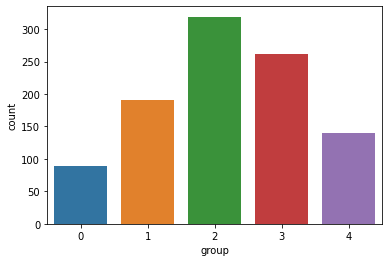

In [15]:
sns.countplot(data['group'])

<AxesSubplot:xlabel='average_score', ylabel='reading'>

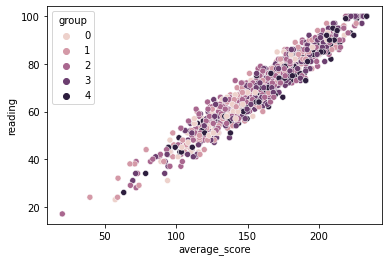

In [16]:
sns.scatterplot(x=data['average_score'],y=data['reading'],hue=data['group'])

<AxesSubplot:xlabel='average_score', ylabel='reading'>

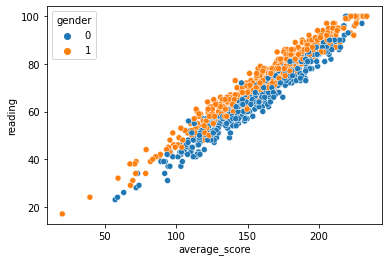

In [17]:
sns.scatterplot(x=data['average_score'],y=data['reading'],hue=data['gender'])

<AxesSubplot:xlabel='average_score', ylabel='reading'>

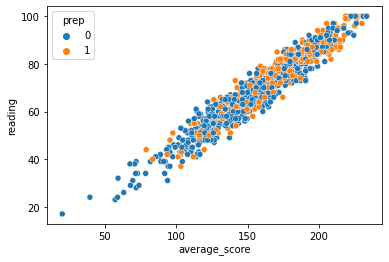

In [18]:
sns.scatterplot(x=data['average_score'],y=data['reading'],hue=data['prep'])

Linear Regression Model

In [19]:
data.head(5)

,gender,group,parent_edu,lunch,prep,math,reading,writing,average_score
0,1,1,0,0,0,72,72,74,168.666667
1,1,2,1,0,1,69,90,88,188.333333
2,1,1,2,0,0,90,95,93,216.000000
3,0,0,3,1,0,47,57,44,118.666667
4,0,2,1,0,0,76,78,75,179.000000


In [20]:
x=data.drop(columns='average_score').values
y=data['average_score'].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model_1=LinearRegression()

In [24]:
model_1.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score

In [26]:
y_pred=model_1.predict(x_test)
y_pred

array([132.        , 154.66666667, 166.66666667, 127.33333333,
       126.33333333, 121.        , 111.        ,  94.        ,
       157.        , 193.33333333, 155.        , 115.        ,
       166.33333333, 177.        , 173.        , 184.        ,
       214.        , 213.66666667, 135.        , 119.33333333,
       200.        , 182.        , 170.33333333, 142.        ,
       122.66666667, 145.66666667, 151.33333333, 148.66666667,
       135.66666667, 153.33333333, 108.        , 176.66666667,
       125.66666667, 140.66666667, 133.66666667, 198.33333333,
       159.        , 133.66666667, 155.        , 206.        ,
       192.        , 175.        , 161.66666667, 166.66666667,
       195.66666667, 201.66666667, 137.66666667, 153.66666667,
       139.33333333, 218.66666667, 190.        , 211.33333333,
       174.33333333, 188.33333333, 170.        , 108.66666667,
       164.66666667, 177.33333333, 126.66666667, 226.33333333,
       117.66666667, 123.        , 106.66666667, 130.  

In [27]:
r2_score(y_test,y_pred)

1.0

**Overfitting** **Model**

Making Decision Control Tree

In [28]:
data.head(5)

,gender,group,parent_edu,lunch,prep,math,reading,writing,average_score
0,1,1,0,0,0,72,72,74,168.666667
1,1,2,1,0,1,69,90,88,188.333333
2,1,1,2,0,0,90,95,93,216.000000
3,0,0,3,1,0,47,57,44,118.666667
4,0,2,1,0,0,76,78,75,179.000000


In [29]:
x=data.drop(columns='average_score').values
y=data['average_score'].values
ac=[]

Calling Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
for i in range(1,10):
  model_2= RandomForestRegressor(n_estimators=i,random_state=0)
  model_2.fit(x_train,y_train)
  y_pred=model_2.predict(x_test)
  ac.append(r2_score(y_test,y_pred))

In [37]:
print(max(ac))

98.98759759650457
